In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import numpy as np
import scipy

In [12]:
adata = scv.read("adata_postpro.h5ad", cache = True)

saving figure to file figure/mouse_skin_proportions.png


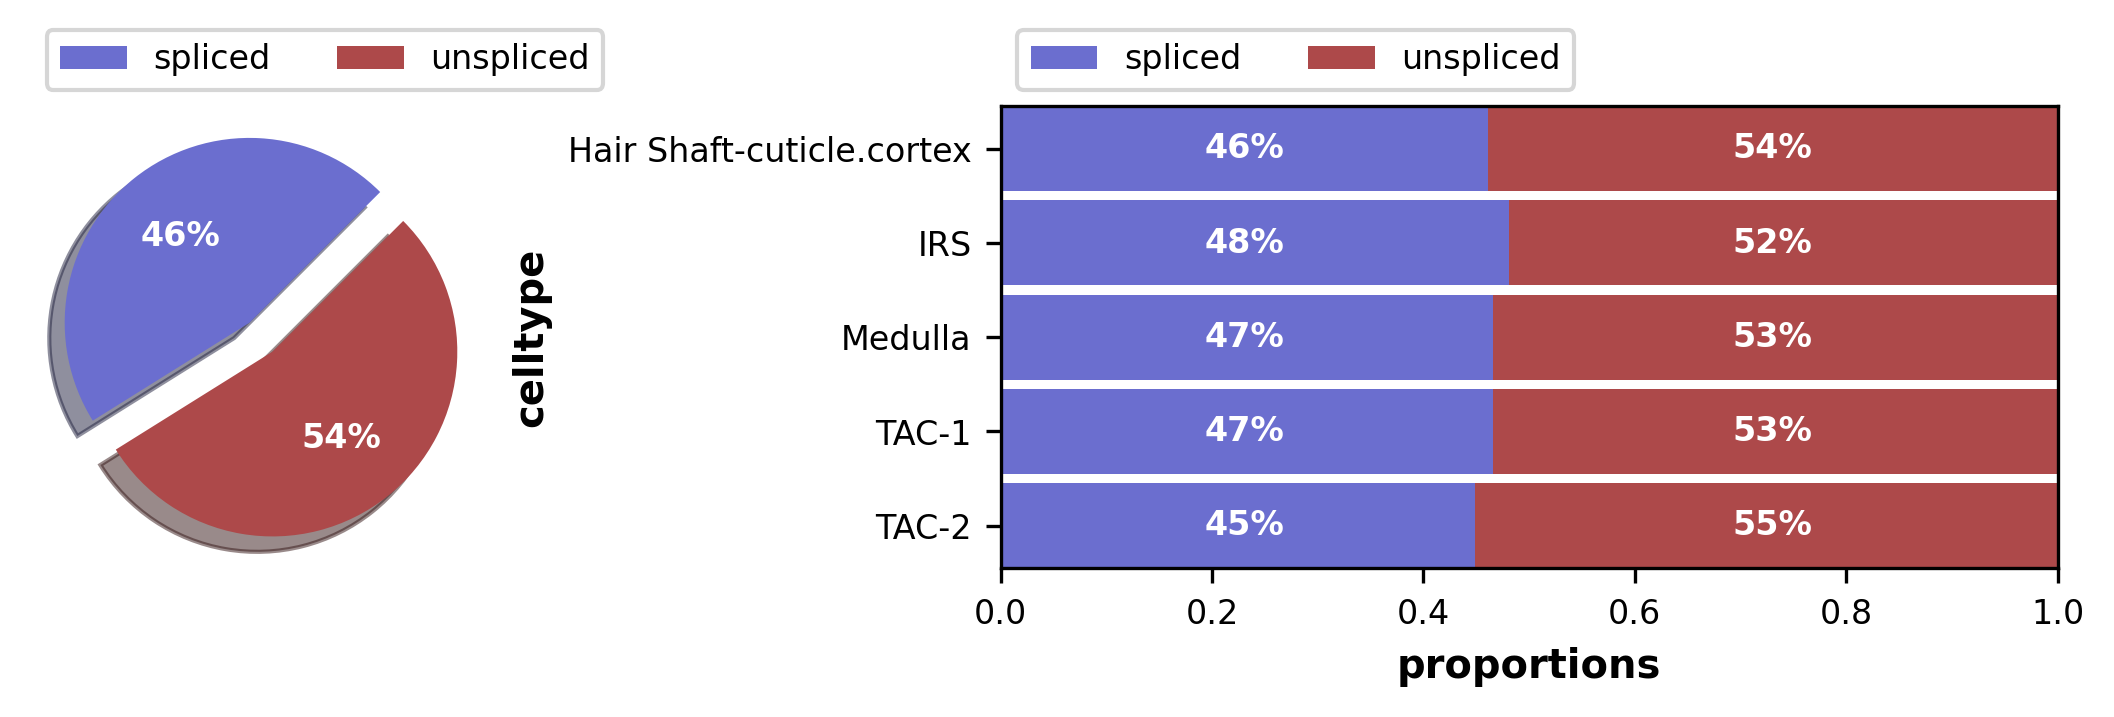

In [3]:
scv.pl.proportions(adata, groupby = "celltype", save = "figure/mouse_skin_proportions.png", dpi = 300, layers = ["spliced", "unspliced"])

In [14]:
scv.tl.recover_dynamics(adata, n_jobs = 16)

recovering dynamics (using 16/24 cores)


  0%|          | 0/141 [00:00<?, ?gene/s]

    finished (0:00:07) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [15]:
scv.tl.velocity(adata, mode='dynamical')

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [16]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/24 cores)


  0%|          | 0/6436 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [17]:
scv.tl.latent_time(adata)

computing terminal states
    identified 5 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


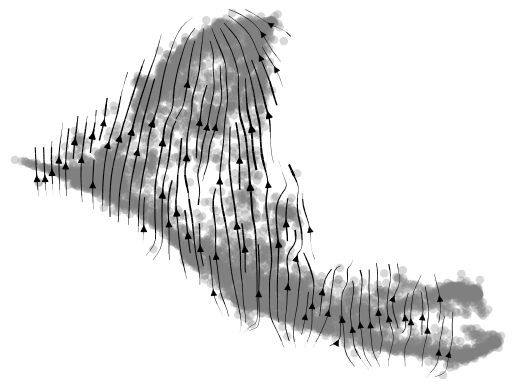

In [5]:
scv.pl.velocity_embedding_stream(adata)

In [6]:
adata.write_h5ad("data/scvelo.h5ad")